In [12]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

import random
import matplotlib.colors as mcolors

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

# Set of English stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /home/aayushkucheria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aayushkucheria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return filtered_tokens

# Inputting and preprocessing our data

We have 4 datasets that we preprocess and combine into one. Each of them contains news article text for different years, all sources from various reputable news sources.

In [14]:
"""Global News Dataset
- 100k articles (50k with full_content)
- 2023 (Oct and Nov)

Source: https://www.kaggle.com/datasets/everydaycodings/global-news-dataset
"""

df_global_news = pd.read_csv('global_news_data/data.csv')

df_global_news = df_global_news[['published_at', 'title', 'source_name',  'full_content', 'url', 'category']]
df_global_news.rename(columns={'full_content': 'text', 'source_name': 'source'}, inplace=True)
df_global_news.dropna(subset=['text'], inplace=True)

df_global_news['date'] = pd.to_datetime(df_global_news['published_at'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')# Extract year from the 'date' column
mask = df_global_news['date'].isna()
df_global_news.loc[mask, 'date'] = pd.to_datetime(df_global_news.loc[mask, 'published_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_global_news['date'] = df_global_news['date'].dt.to_period('M')
df_global_news.drop(columns=['published_at'], inplace=True)

df_global_news['filtered_tokens'] = df_global_news['text'].apply(preprocess_text)
df_global_news['word_count'] = df_global_news['filtered_tokens'].apply(len)


df_global_news


,title,source,text,url,category,date,filtered_tokens,word_count
0,UN Chief Urges World To 'Stop The Madness' Of ...,International Business Times,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,Nepal,2023-10,"[un, antonio, guterres, urged, world, monday, ...",251
3,Sikkim warning: Hydroelectricity push must be ...,The Indian Express,At least 14 persons lost their lives and more ...,https://indianexpress.com/article/opinion/edit...,Nepal,2023-10,"[least, persons, lost, lives, others, includin...",239
6,Pro-Israel rallies allowed in India but Palest...,Al Jazeera English,"India, the first non-Arab country to recognise...",https://www.aljazeera.com/news/2023/10/25/pro-...,Nepal,2023-10,"[india, first, country, recognise, plo, seen, ...",793
7,No nation in the world is buying more planes t...,The Indian Express,Written by Alex Travelli and Hari Kumar No nat...,https://indianexpress.com/article/business/avi...,Nepal,2023-11,"[written, alex, travelli, hari, kumar, nation,...",678
12,PM Hasina’s war on terror gets daughter India’...,The Times of India,NEW DELHI: India preferred Bangladesh over Nep...,https://timesofindia.indiatimes.com/india/pm-h...,Nepal,2023-11,"[new, delhi, india, preferred, bangladesh, nep...",159
...,...,...,...,...,...,...,...,...
105370,"Have done no wrong, only did party work, says ...",The Indian Express,Karnataka Deputy Chief Minister D K Shivakumar...,https://indianexpress.com/article/cities/banga...,Home,2023-11,"[karnataka, deputy, chief, minister, k, shivak...",228
105371,FC Barcelona Guarantees $77.6 Million Champion...,Forbes,FC Barcelona have guaranteed at least $767.6 m...,https://www.forbes.com/sites/tomsanderson/2023...,Home,2023-11,"[fc, barcelona, guaranteed, least, million, ch...",197
105372,Three hospitals ignored her gravely ill fiancé...,NPR,The photo from David and Sarah Lubarsky's wedd...,https://www.npr.org/2023/11/29/1215016001/heal...,Home,2023-11,"[photo, david, sarah, lubarsky, wedding, annou...",298
105373,Kerber’s Farm: Bringing Farm To Table To Manha...,Forbes,Kerber’s Farm: Bringing Farm To Table To Manha...,https://www.forbes.com/sites/garystern/2023/11...,Home,2023-11,"[kerber, farm, bringing, farm, table, manhatta...",442


In [15]:
"""MN-DS-news-classification.csv:
- 10k articles
- 2019

Source: https://zenodo.org/records/7394851
"""

df_mnds = pd.read_csv('MN-DS-news-classification.csv')
df_mnds = df_mnds[['date', 'title', 'source',  'content', 'url', 'category_level_2']]
df_mnds.rename(columns={'content': 'text', 'category_level_2': 'category'}, inplace=True)
df_mnds['date'] = pd.to_datetime(df_mnds['date']).dt.to_period('M')

df_mnds['filtered_tokens'] = df_mnds['text'].apply(preprocess_text)
df_mnds['word_count'] = df_mnds['filtered_tokens'].apply(len)


df_mnds

,date,title,source,text,url,category,filtered_tokens,word_count
0,2019-10,Virginia mom charged with murder in 2-year-old...,abcnews,The Virginia woman whose 2-year-old son was fo...,https://abcnews.go.com/US/wireStory/virginia-m...,crime,"[virginia, woman, whose, son, found, trash, in...",75
1,2019-11,2 escaped murder suspects arrested at US-Mexic...,abcnews,Authorities are trying to determine if anyone ...,https://abcnews.go.com/US/wireStory/escaped-mu...,crime,"[authorities, trying, determine, anyone, helpe...",374
2,2019-11,"Family turns in escaped boy, 13, suspected in ...",abcnews,A 13-year-old suspect in a double homicide who...,https://abcnews.go.com/US/wireStory/family-tur...,crime,"[suspect, double, homicide, escaped, custody, ...",70
3,2019-12,Mother charged with murder in deaths of 2 youn...,abcnews,The mother of two young children found hanging...,https://abcnews.go.com/US/wireStory/mother-cha...,crime,"[mother, two, young, children, found, hanging,...",58
4,2019-04,"Physician, Father and Caretaker of 29 Year Old...",ageofautism,"""One family member said Derek “can be violent ...",http://feedproxy.google.com/~r/ageofautism/~3/...,crime,"[one, family, member, said, derek, violent, at...",270
...,...,...,...,...,...,...,...,...
10912,2019-12,"Iran to build over 30,000 housing units in Syr...",therussophileorg,This post was originally published on this sit...,https://www.therussophile.org/iran-to-build-ov...,post-war reconstruction,"[post, originally, published, site, beirut, le...",114
10913,2019-10,Ukraine has no money for reconstruction of Don...,therussophileorg,This post was originally published on this sit...,https://www.therussophile.org/ukraine-has-no-m...,post-war reconstruction,"[post, originally, published, site, kiev, octo...",44
10914,2019-07,Iran’s contribution is needed to rebuild Iraq ...,therussophileorg,This\n\n[post](http://www.presstv.ir/Detail/20...,https://www.therussophile.org/irans-contributi...,post-war reconstruction,"[post, http, originally, published, site, http...",181
10915,2019-09,Iraqi president demands international help for...,therussophileorg,This\n\n[post](http://www.presstv.ir/Detail/20...,https://www.therussophile.org/iraqi-president-...,post-war reconstruction,"[post, http, originally, published, site, http...",138


In [16]:
"""Real Time News

- 2023 (10 May - 1 Aug)
- 5k articles

Source: https://huggingface.co/datasets/RealTimeData/News_August_2023?row=0
"""

df_mid2023 = pd.read_parquet('news_aug_2023.parquet')

df_mid2023 = df_mid2023[['date_publish', 'title', 'source_domain', 'maintext', 'url']]
df_mid2023.rename(columns={'maintext': 'text', 'source_domain': 'source'}, inplace=True)

df_mid2023['date'] = pd.to_datetime(df_mid2023['date_publish']).dt.to_period('M')
df_mid2023.drop(columns=['date_publish'], inplace=True)

df_mid2023['filtered_tokens'] = df_mid2023['text'].apply(preprocess_text)
df_mid2023['word_count'] = df_mid2023['filtered_tokens'].apply(len)

df_mid2023


,title,source,text,url,date,filtered_tokens,word_count
0,‘Therapeutic lifestyle modification’ lowers ri...,dailytrust.com,A consultant cardiologist at the Federal Medic...,https://dailytrust.com/therapeutic-lifestyle-m...,2023-08,"[consultant, cardiologist, federal, medical, c...",380
1,How Nasarawa govt is responding to diphtheria ...,dailytrust.com,The Nasarawa State government is taking measur...,https://dailytrust.com/how-nasarawa-govt-is-re...,2023-08,"[nasarawa, state, government, taking, measures...",270
2,NBA Conference: Lawyers divided over parallel ...,dailytrust.com,Lawyers are divided over the renewed moves to ...,https://dailytrust.com/nba-conference-lawyers-...,2023-08,"[lawyers, divided, renewed, moves, form, paral...",871
3,D’Tigress to face Mozambique or Cote d’Ivoire ...,dailytrust.com,D’Tigress will face the winners between Mozamb...,https://dailytrust.com/dtigress-to-face-mozamb...,2023-08,"[tigress, face, winners, mozambique, cote, ivo...",176
4,Radioactive beads in the wrist that can fight ...,dailytrust.com,Liver cancer patients are being spared overnig...,https://dailytrust.com/radioactive-beads-in-th...,2023-08,"[liver, cancer, patients, spared, overnight, h...",412
...,...,...,...,...,...,...,...
5054,"Breast cancer survivor says research, newer dr...",www.wkbn.com,CLEVELAND (WJW) – Lesley Kiraly Hosta was just...,https://www.wkbn.com/news/ohio/breast-cancer-s...,2023-08,"[cleveland, wjw, lesley, kiraly, hosta, found,...",200
5055,Child with cancer gets invited back stage to L...,www.wkbn.com,DENVER (KDVR) — Country artist Luke Bryan invi...,https://www.wkbn.com/news/national-world/luke-...,2023-08,"[denver, kdvr, country, artist, luke, bryan, i...",126
5056,Did the government confirm aliens exist?,fox2now.com,"(NewsNation) — As in decades past, the questio...",https://fox2now.com/news/national/did-the-gove...,2023-07,"[newsnation, decades, past, question, whether,...",338
5057,Child with cancer gets invited back stage to L...,fox2now.com,DENVER (KDVR) — Country artist Luke Bryan invi...,https://fox2now.com/news/national/luke-bryan-i...,2023-08,"[denver, kdvr, country, artist, luke, bryan, i...",126


In [17]:
"""Real Time News

- 2021 (July - Aug)
- 4k articles

Source: https://huggingface.co/datasets/RealTimeData/News_Seq_2021
"""

df_mid2021 = pd.read_parquet('news_2021.parquet')

df_mid2021 = df_mid2021[['date_publish', 'title', 'source_domain', 'maintext', 'url']]
df_mid2021.rename(columns={'maintext': 'text', 'source_domain': 'source'}, inplace=True)

df_mid2021['date'] = pd.to_datetime(df_mid2021['date_publish']).dt.to_period('M')
df_mid2021.drop(columns=['date_publish'], inplace=True)

df_mid2021['filtered_tokens'] = df_mid2021['text'].apply(preprocess_text)
df_mid2021['word_count'] = df_mid2021['filtered_tokens'].apply(len)

df_mid2021


,title,source,text,url,date,filtered_tokens,word_count
0,Shirley Smith Moore,panews.com,"Shirley Smith Moore, 78, of Port Neches, passe...",https://panews.com/2021/08/19/shirley-smith-mo...,2021-08,"[shirley, smith, moore, port, neches, passed, ...",114
1,Tax rate set in Port Neches following council ...,panews.com,PORT NECHES — Port Neches has a new tax rate t...,https://panews.com/2021/08/19/tax-rate-set-in-...,2021-08,"[port, neches, port, neches, new, tax, rate, c...",239
2,Local basketball hero Kenneth Lofton Jr. recog...,panews.com,Former Memorial High School basketball player ...,https://panews.com/2021/08/19/local-basketball...,2021-08,"[former, memorial, high, school, basketball, p...",265
3,BJP has tried to weaponised Partition for elec...,scroll.in,Independence Day has always been a deeply poli...,https://scroll.in/article/1003098/partition-ho...,2021-08,"[independence, day, always, deeply, political,...",570
4,S.C. Woman Accuses Merck of Hiding Gardasil HP...,www.harrismartin.com,"CHARLESTON, S.C. — A South Carolina woman has ...",https://www.harrismartin.com/publications/4/dr...,2021-08,"[charleston, south, carolina, woman, sued, mer...",58
...,...,...,...,...,...,...,...
4247,Dorm room ideas for guys,fox2now.com,Every dormitory has its own personality and cu...,https://fox2now.com/reviews/br/home-br/decor-b...,2021-08,"[every, dormitory, personality, culture, want,...",642
4248,Best ways to help your kid focus on their home...,fox2now.com,Some kids lose their focus when tasks seem ove...,https://fox2now.com/reviews/br/education-br/pa...,2021-08,"[kids, lose, focus, tasks, seem, overwhelming,...",838
4249,'Unruly' passengers arrested at Tennessee airp...,fox2now.com,"NASHVILLE, Tenn. — Two “unruly” passengers wer...",https://fox2now.com/news/national/unruly-passe...,2021-08,"[nashville, two, unruly, passengers, arrested,...",158
4250,Best laptop for elementary school,fox2now.com,Children in the United States were not legally...,https://fox2now.com/reviews/br/electronics-br/...,2021-08,"[children, united, states, legally, required, ...",576


In [18]:
"""Combining all the different (news) datasets we have"""

df = pd.concat([df_mnds, df_mid2023, df_mid2021, df_global_news], ignore_index=True)
df['year'] = df['date'].dt.year  # Extract year from date

df


,date,title,source,text,url,category,filtered_tokens,word_count,year
0,2019-10,Virginia mom charged with murder in 2-year-old...,abcnews,The Virginia woman whose 2-year-old son was fo...,https://abcnews.go.com/US/wireStory/virginia-m...,crime,"[virginia, woman, whose, son, found, trash, in...",75,2019
1,2019-11,2 escaped murder suspects arrested at US-Mexic...,abcnews,Authorities are trying to determine if anyone ...,https://abcnews.go.com/US/wireStory/escaped-mu...,crime,"[authorities, trying, determine, anyone, helpe...",374,2019
2,2019-11,"Family turns in escaped boy, 13, suspected in ...",abcnews,A 13-year-old suspect in a double homicide who...,https://abcnews.go.com/US/wireStory/family-tur...,crime,"[suspect, double, homicide, escaped, custody, ...",70,2019
3,2019-12,Mother charged with murder in deaths of 2 youn...,abcnews,The mother of two young children found hanging...,https://abcnews.go.com/US/wireStory/mother-cha...,crime,"[mother, two, young, children, found, hanging,...",58,2019
4,2019-04,"Physician, Father and Caretaker of 29 Year Old...",ageofautism,"""One family member said Derek “can be violent ...",http://feedproxy.google.com/~r/ageofautism/~3/...,crime,"[one, family, member, said, derek, violent, at...",270,2019
...,...,...,...,...,...,...,...,...,...
78655,2023-11,"Have done no wrong, only did party work, says ...",The Indian Express,Karnataka Deputy Chief Minister D K Shivakumar...,https://indianexpress.com/article/cities/banga...,Home,"[karnataka, deputy, chief, minister, k, shivak...",228,2023
78656,2023-11,FC Barcelona Guarantees $77.6 Million Champion...,Forbes,FC Barcelona have guaranteed at least $767.6 m...,https://www.forbes.com/sites/tomsanderson/2023...,Home,"[fc, barcelona, guaranteed, least, million, ch...",197,2023
78657,2023-11,Three hospitals ignored her gravely ill fiancé...,NPR,The photo from David and Sarah Lubarsky's wedd...,https://www.npr.org/2023/11/29/1215016001/heal...,Home,"[photo, david, sarah, lubarsky, wedding, annou...",298,2023
78658,2023-11,Kerber’s Farm: Bringing Farm To Table To Manha...,Forbes,Kerber’s Farm: Bringing Farm To Table To Manha...,https://www.forbes.com/sites/garystern/2023/11...,Home,"[kerber, farm, bringing, farm, table, manhatta...",442,2023


### How many news articles do we have per year?

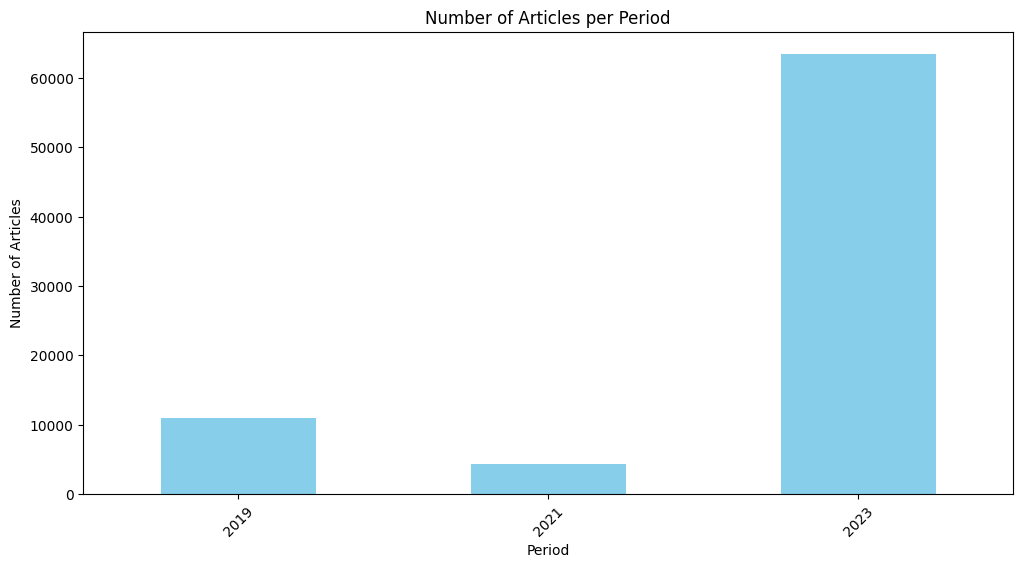

In [19]:
# Group by 'date' and count the number of articles
articles_per_period = df.groupby('year').size()

# Plotting
plt.figure(figsize=(12, 6))
articles_per_period.plot(kind='bar', color='skyblue')
plt.title('Number of Articles per Period')
plt.xlabel('Period')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

## Alright, now let's start the analysis.

Starting with computing the word frequencies.

In [21]:
from tqdm import tqdm
import numpy as np

def count_words_by_group(df, group_by_column):
    """
    Count words for each text entry and aggregate the counts by the specified group to provide word frequencies.

    Args:
    df (DataFrame): The DataFrame containing the text data.
    group_by_column (str): The column name to group by (e.g., 'year', 'date').

    Returns:
    DataFrame: A DataFrame with the word frequencies for each group.
    """
    # Initialize an empty Counter to aggregate word counts
    def aggregate_counters(counters):
        total_counter = Counter()
        for counter in counters:
            total_counter.update(counter)
        return total_counter

    # Aggregate word counts by the specified group
    grouped_word_counts = df.groupby(group_by_column)['filtered_tokens'].agg(aggregate_counters).reset_index()

    grouped_word_counts.set_index(group_by_column, inplace=True)

    return grouped_word_counts

# monthly_word_counts = count_words_by_group(df, 'date')
yearly_word_counts = count_words_by_group(df, 'year')

In [22]:
word_counts = yearly_word_counts
# word_counts = monthly_word_counts

word_counts

,filtered_tokens
year,
2019,"{'virginia': 322, 'woman': 1275, 'whose': 1143..."
2021,"{'shirley': 35, 'smith': 289, 'moore': 35, 'po..."
2023,"{'consultant': 952, 'cardiologist': 22, 'feder..."


In [ ]:
word_frequencies = {}
for date, row in word_counts.iterrows():
    total_words = sum(row['filtered_tokens'].values())
    word_frequencies[date] = {word: count / total_words for word, count in row['filtered_tokens'].items()}
# word_frequencies

## How have some specific words changed over time?

In [83]:
def plot_combined_word_trends(word_frequencies, words, y_upper_limit=None, title=None):
    periods = sorted(word_frequencies.keys())
    plot_periods = [int(period.to_timestamp().strftime('%Y')) if isinstance(period, pd.Period) else period for period in periods]
    colors = list(mcolors.TABLEAU_COLORS.values())
    markers = ['o', 's', '^', 'D', 'v', 'p', '*', 'X']

    fig, ax = plt.subplots(figsize=(14, 8))

    for i, word in enumerate(words):
        frequencies = [word_frequencies[period].get(word, 0) for period in periods]
        if frequencies[0] != 0:
            base_frequency = frequencies[0]
            percentage_changes = [(freq - base_frequency) / base_frequency * 100 for freq in frequencies]
            ax.plot(plot_periods, percentage_changes, label=word, linestyle='-', color=colors[i], marker=markers[i])

    if title:
        ax.set_title(title, fontsize=16)
    else:
        ax.set_title('Percentage Change of Specific (chatGPT) Words Over Time', fontsize=16)

    ax.set_xlabel('Year', fontsize=14)
    ax.set_ylabel('Percentage Change', fontsize=14)
    ax.grid(False)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(prop={'size': 12})

    # Set the x-axis ticks to integer years
    ax.set_xticks(plot_periods)
    ax.set_xticklabels(plot_periods)

    if y_upper_limit:
        ax.set_ylim(top=y_upper_limit)

    plt.tight_layout()
    plt.show()

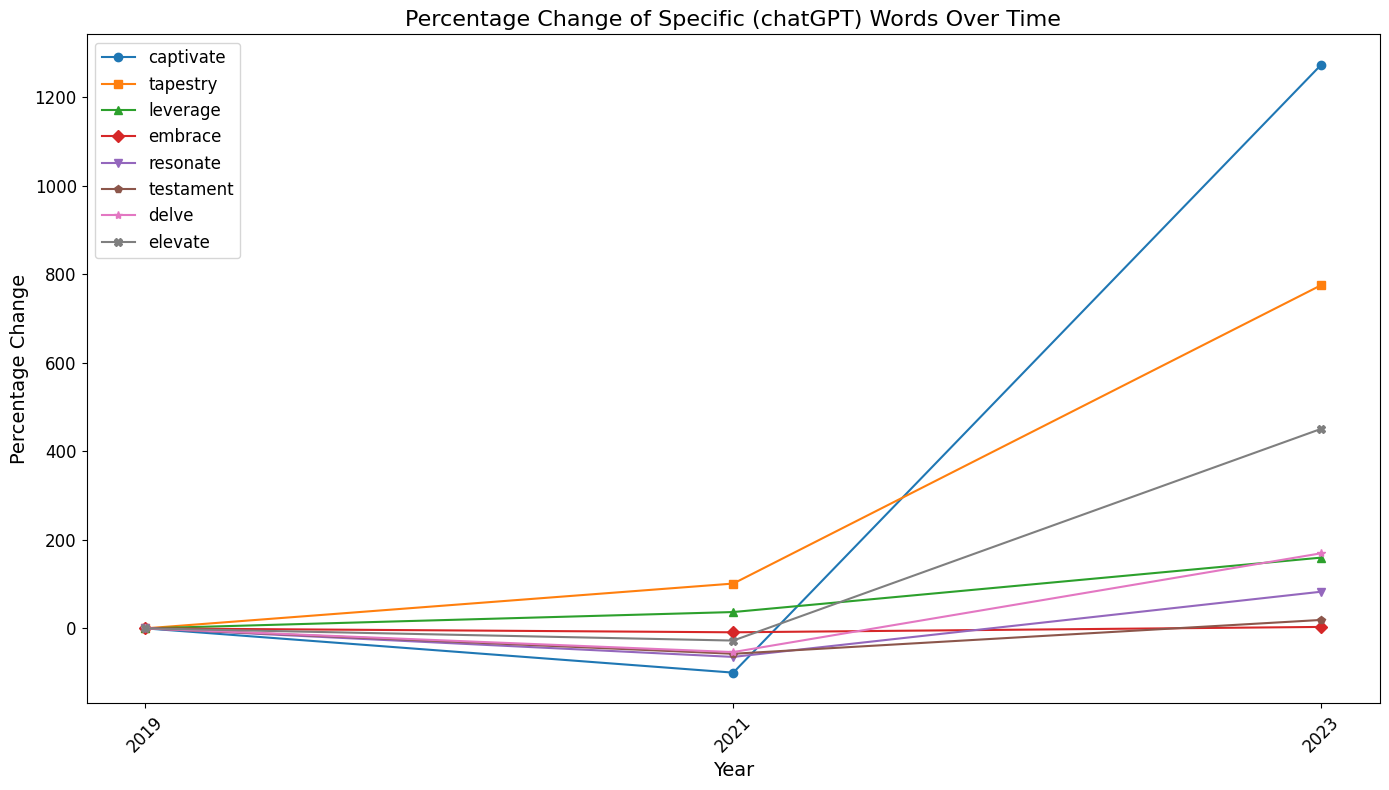

In [65]:
words_to_plot = ['captivate', 'tapestry', 'leverage', 'embrace', 'resonate', 'testament', 'delve', 'elevate']
plot_combined_word_trends(word_frequencies, words_to_plot)

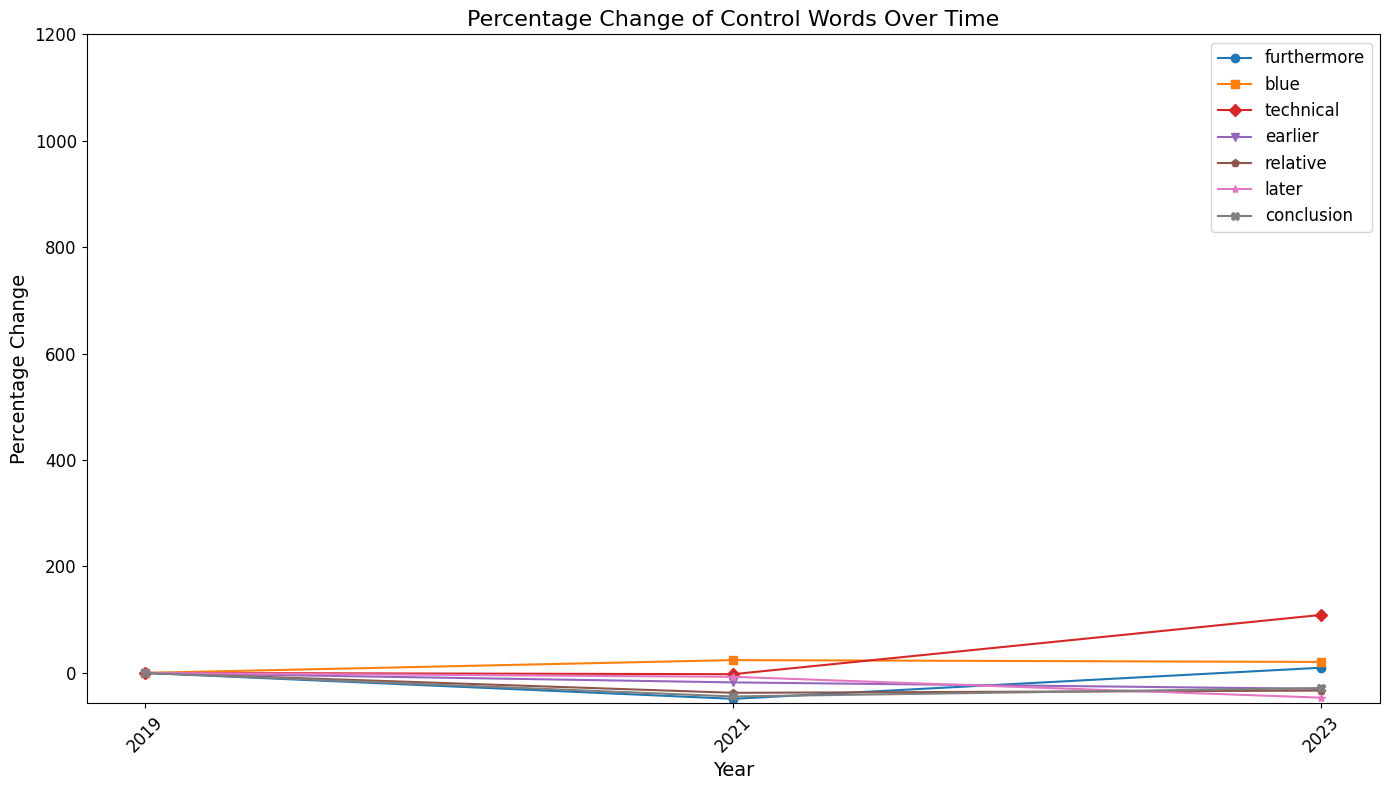

In [67]:
words_to_plot = ['furthermore', 'blue', 'after', 'technical', 'earlier', 'relative', 'later', 'conclusion']
plot_combined_word_trends(word_frequencies, words_to_plot, 1200, "Percentage Change of Control Words Over Time")

In [ ]:
def plot_word_percentage_increase(word_frequencies, words, ylimit=None, title=None):
    periods = sorted(word_frequencies.keys())
    plot_periods = [period for period in periods if period == 2019 or period == 2023]
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(words)))

    fig, ax = plt.subplots(figsize=(14, 8))

    word_changes = {}
    for word in words:
        frequencies = [word_frequencies[period].get(word, 0) for period in plot_periods]
        if frequencies[0] != 0:
            base_frequency = frequencies[0]
            percentage_increase = ((frequencies[1] - base_frequency) / base_frequency) * 100
            word_changes[word] = percentage_increase

    sorted_word_changes = dict(sorted(word_changes.items(), key=lambda item: item[1], reverse=True))

    for i, (word, percentage_increase) in enumerate(sorted_word_changes.items()):
        ax.bar(word, percentage_increase, color=colors[i])

    ax.set_xlabel('Words', fontsize=14)
    ax.set_ylabel('Percentage Increase', fontsize=14)

    if title:
        ax.set_title(title, fontsize=16)
    else:
        ax.set_title('Percentage Change of Specific (chatGPT) Words from 2019 to 2023', fontsize=16)
    ax.grid(False)
    ax.tick_params(axis='x', rotation=45, labelsize=12)

    if ylimit:
        ax.set_ylim(top=ylimit)

    plt.tight_layout()
    plt.show()

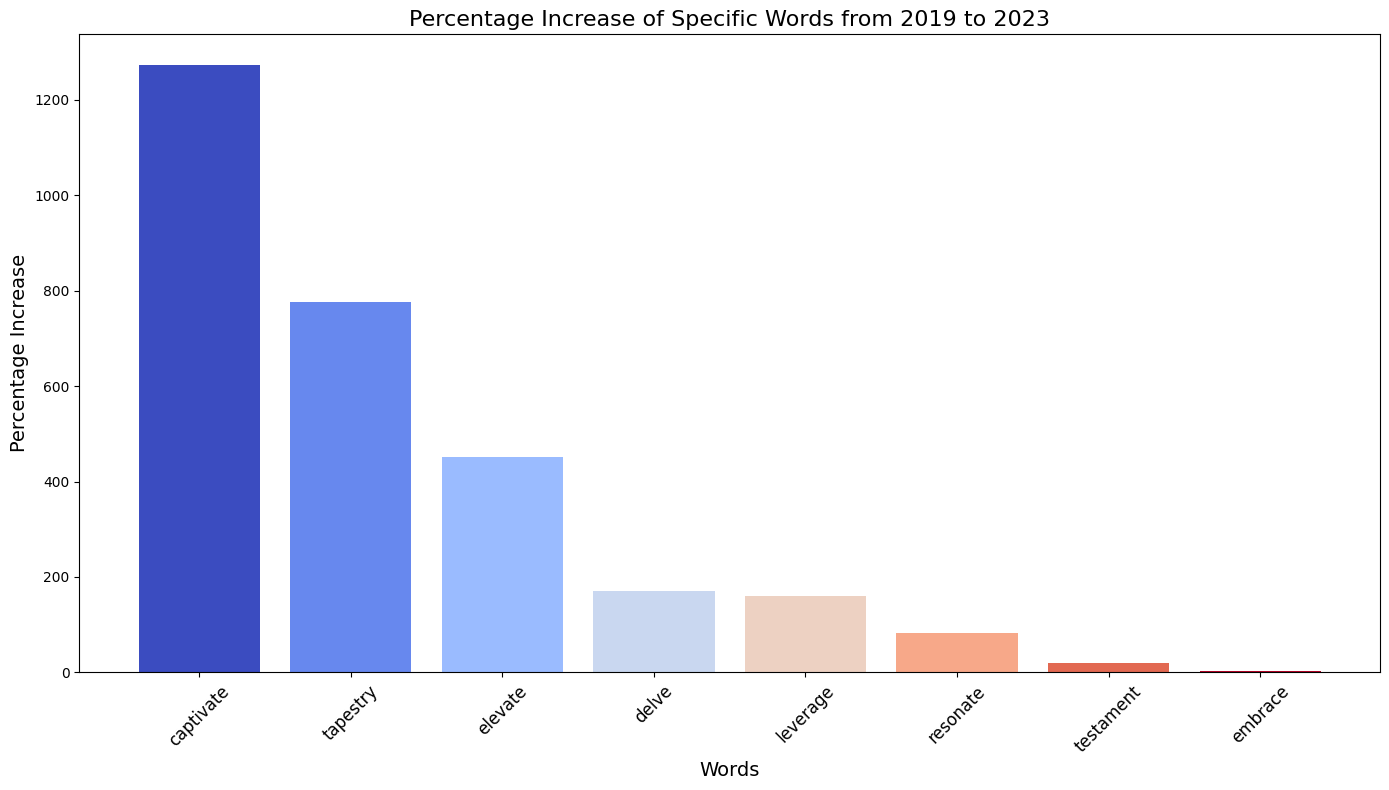

In [74]:
words_to_plot = ['captivate', 'tapestry', 'leverage', 'embrace', 'resonate', 'testament', 'delve', 'elevate']
plot_word_percentage_increase(word_frequencies, words_to_plot)

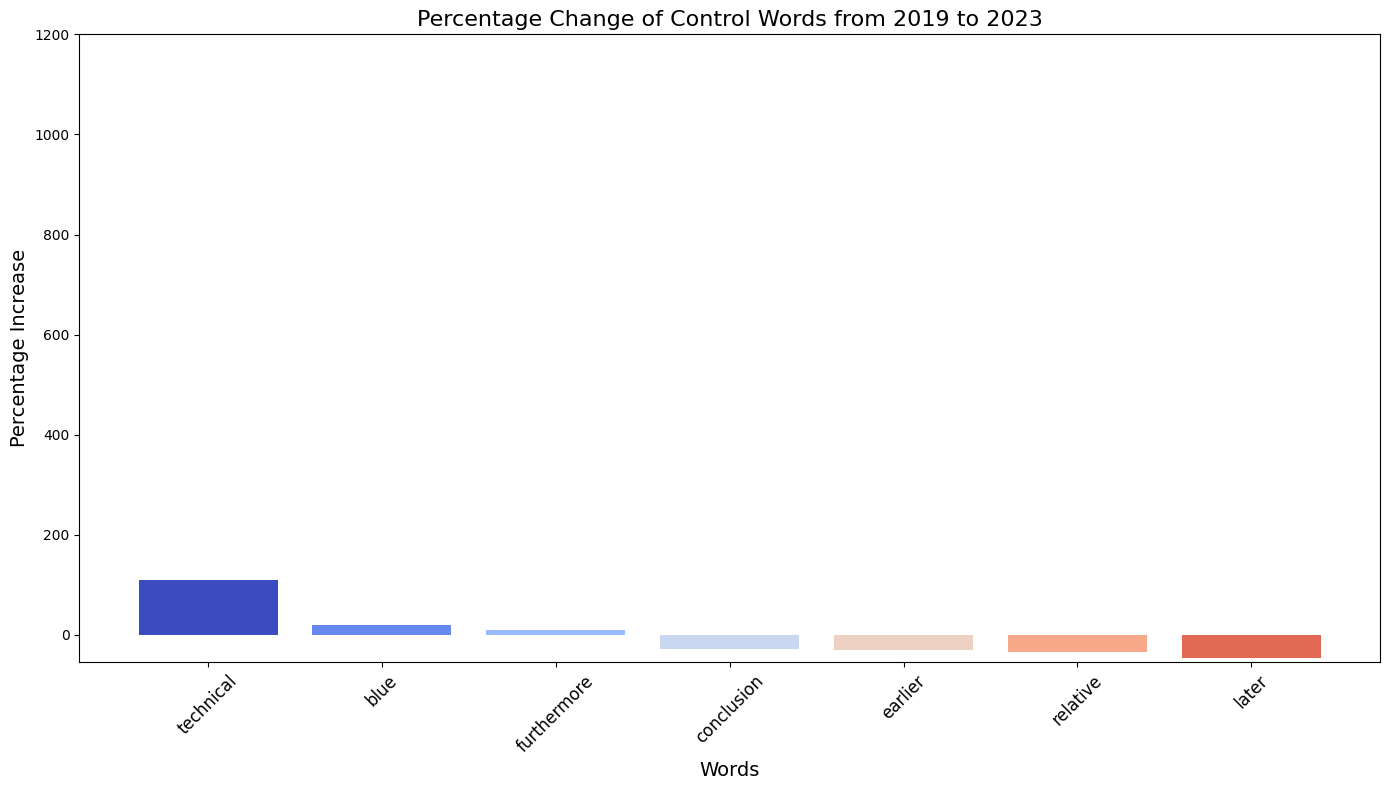

In [75]:
words_to_plot = ['furthermore', 'blue', 'after', 'technical', 'earlier', 'relative', 'later', 'conclusion']
plot_word_percentage_increase(word_frequencies, words_to_plot, 1200, "Percentage Change of Control Words from 2019 to 2023")

# Appendix

Some other miscellenaous stuff we were playing around with to explore the data. Not relevant to the analysis above.

## Let's plot the most popular words

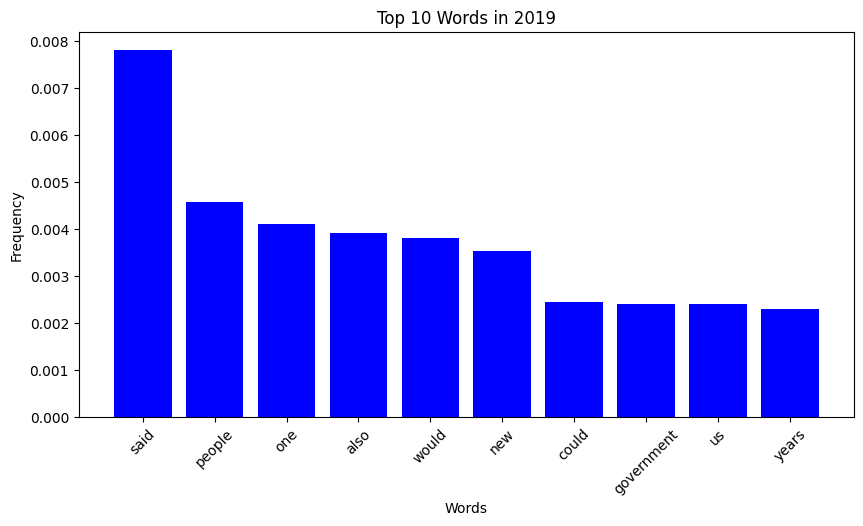

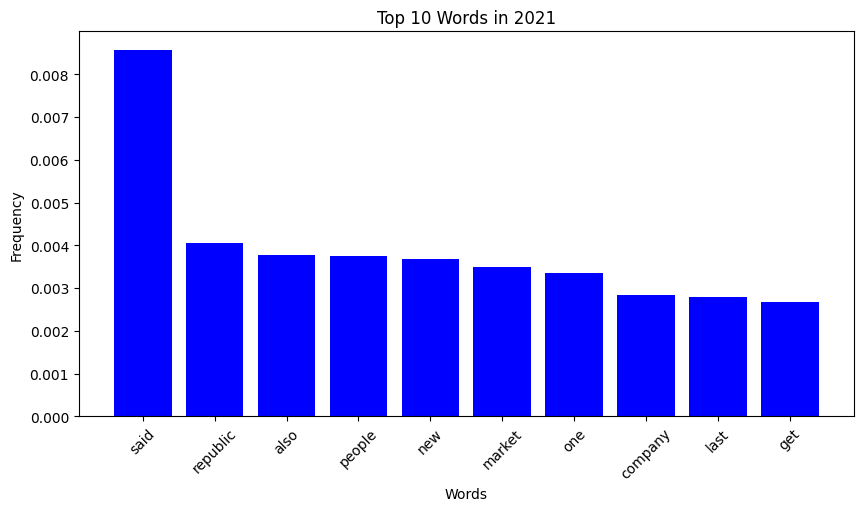

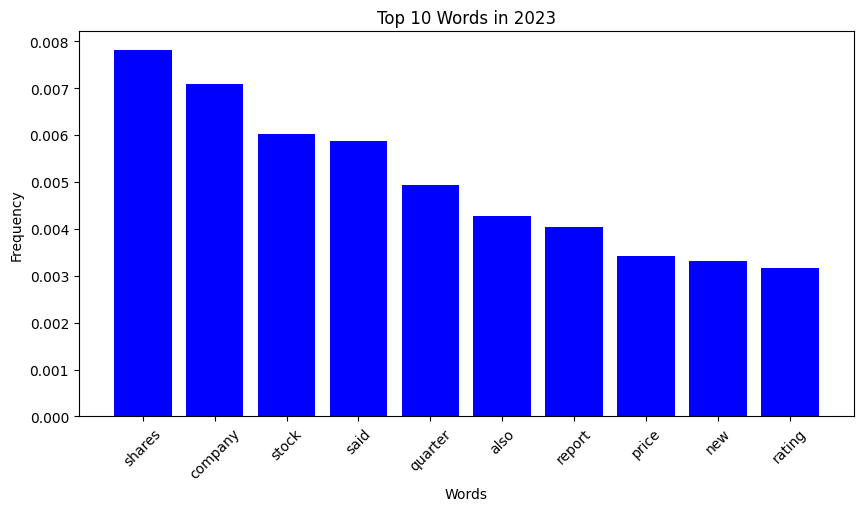

In [24]:
def plot_top_words(word_frequencies, top_n=10):
    """
    Plot the top N words for each period (month/year) based on their frequencies.

    Args:
    word_frequencies (dict): A dictionary where each key is a period (e.g., '2023-10') and each value is another dictionary of word frequencies.
    top_n (int): The number of top words to plot.
    """
    for period, frequencies in word_frequencies.items():
        # Sort words by frequency and select the top N
        top_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)[:top_n]
        words, counts = zip(*top_words)

        plt.figure(figsize=(10, 5))
        plt.bar(words, counts, color='blue')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title(f'Top {top_n} Words in {period}')
        plt.xticks(rotation=45)
        plt.show()

plot_top_words(word_frequencies, top_n=10)

## What about words that have had the biggest increase?

In [25]:
def find_top_increasing_words(word_frequencies, top_n=5):
    """
    Find the top N words with the biggest frequency increase over the time periods.

    Args:
    word_frequencies (dict): A dictionary where each key is a period (e.g., '2023-10') and each value is another dictionary of word frequencies.
    top_n (int): The number of top words to identify based on frequency increase.

    Returns:
    dict: A dictionary where each key is a period and the value is a list of tuples (word, increase) for the top N words with the biggest increase.
    """
    periods = list(word_frequencies.keys())
    top_increasing_words = {}

    # Iterate over each period, except the first one, to compare with the previous period
    for i in range(1, len(periods)):
        previous_period = periods[i-1]
        current_period = periods[i]
        previous_freqs = word_frequencies[previous_period]
        current_freqs = word_frequencies[current_period]

        # Calculate the frequency increase for words in the current period
        increases = {}
        for word in current_freqs:
            prev_count = previous_freqs.get(word, 0)
            curr_count = current_freqs[word]
            if prev_count > 0:  # Only consider words that existed in the previous period
                increase = (curr_count - prev_count) / prev_count
                if increase > 0:
                    increases[word] = increase

        # Sort words by the biggest increase and select the top N
        top_words = sorted(increases.items(), key=lambda x: x[1], reverse=True)[:top_n]
        top_increasing_words[current_period] = top_words

    return top_increasing_words

top_increasing_words = find_top_increasing_words(word_frequencies, top_n=10)
for period, words in top_increasing_words.items():
    print(f"Top increasing words in {period}: {words}")

Top increasing words in 2021: [('btc', 2730.713020129912), ('etf', 807.9492700495208), ('ethereum', 581.5642131326773), ('cboe', 406.49310245031836), ('pomerantz', 400.4561675992025), ('bento', 308.8959890239458), ('tailgate', 273.68053572577014), ('faulconer', 264.62513344909644), ('onlyfans', 255.56973117242265), ('capitalization', 246.51432889574892)]
Top increasing words in 2023: [('mins', 488.2886925547454), ('nov', 253.50195696750504), ('retrieved', 200.36265075733834), ('openai', 168.37530270818434), ('kano', 157.67959556261567), ('reproduced', 132.49679254450436), ('osun', 98.17474722663478), ('gaza', 95.84549214269478), ('bola', 74.62822776437542), ('infosys', 73.94976872902218)]
